# TD1: Lotka-Volterra's prey-predator enzymatic model

<img src="PreyPredator.jpg" alt="PreyPredator.jpg" style="width: 600px;"/>

- modelled here with a reaction network
- differential, stochastic and boolean semantics
- addition of immigration/emigration reactions

F. Fages, 18 Jan. 2019, 24 Jan. 2020, 19 Jan. 2021

### Chemical reaction network (CRN)
Example of Lotka-Volterra prey-predator mathematical model written with enzymatic reactions with mass action law kinetics
* the prey species A reproduces by autosynthesis, and is degraded by B
* the predator species B reproduces by autocatalysis of A, and degrades 

In [1]:
present(A,a). present(B,b).

In [2]:
k1*A*B for A+B => 2*B.

In [3]:
k2*A for A => 2*A.

In [4]:
k3*B for B => _.

In [5]:
parameter(a=1, b=1, k1=2, k2=2, k3=1).

In [6]:
list_model.

k1*A*B for A+B=>2*B.
k2*A for A=>2*A.
k3*B for B=>_.
present(A,a).
present(B,b).
parameter(
  a = 1,
  b = 1,
  k1 = 2,
  k2 = 2,
  k3 = 1
).


### Graphical views
* directed hypergraph of reactions (bipartite graph of species and reactions)
* labelled directed graph of influences (abstraction of positive and negative influences between species)

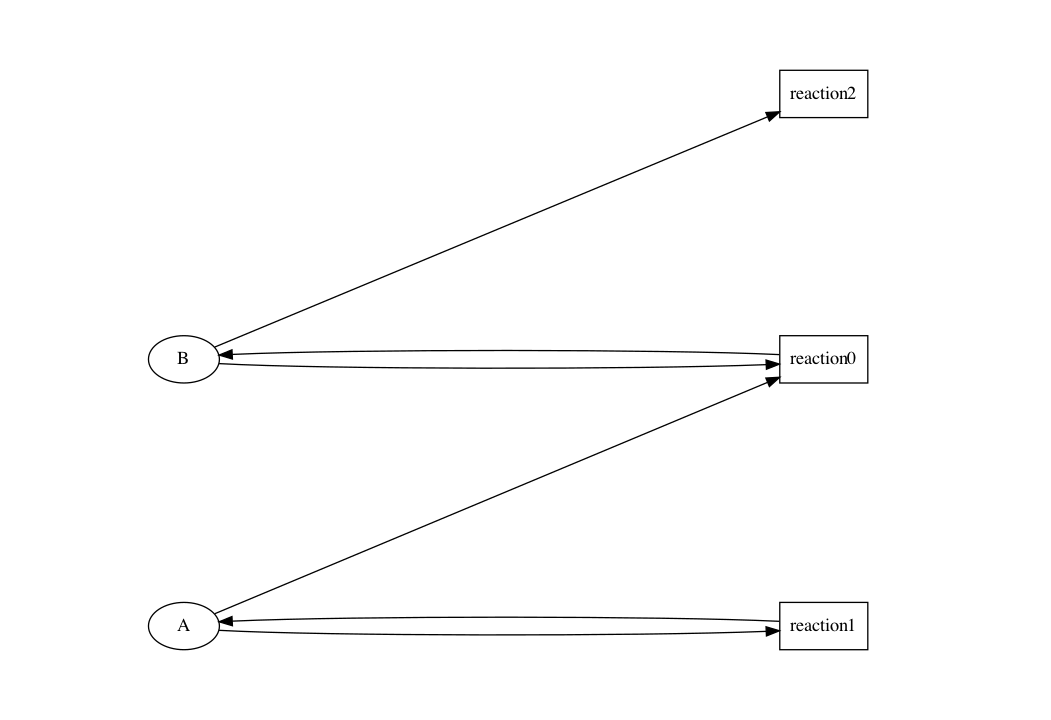

In [7]:
draw_reactions.

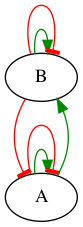

In [8]:
draw_influences.

## Continuous semantics
* Ordinary differential equations
* sustained oscillations and limit cycle

In [9]:
list_ode.

In [10]:
search_conservations.

No complex invariant found


In [11]:
option(time:40).

In [12]:
numerical_simulation. plot.

In [13]:
plot(show:B, against:A).

In [14]:
%slider k1 k2 k3 a b

Box(children=(SelectionSlider(continuous_update=False, description='k1', index=10, layout=Layout(min_width='30…

## Stochastic semantics
* With this parameter set, the prey and predator extend almost surely
* The intuitive explanation is that low concentrations become almost surely 0 at some time point in the stochastic simulation.

In [15]:
option(method:ssa). seed(0). numerical_simulation. plot.

In [16]:
plot(show:B, against:A).

In [17]:
%slider k1 k2 k3 a b

Box(children=(SelectionSlider(continuous_update=False, description='k1', index=10, layout=Layout(min_width='30…

## Boolean semantics
* reason just on the presence or absence of molecular species
* asynchronous Boolean transition system ignoring reaction rates
* SAT algorithm for enumerating all stable states, here: 
 * either both A, B absent is a stable state
 * or B absent A present
 * yet both A and B present is not stable since A and B may disappear in this case

* Computation Tree Logic (CTL) symbolic model-checking algorithm for enumerating possible qualitative behaviors of interest, here:
 * both A and B may extinguish
 * species A may survive with no possibility of disappearing (reachability of stable state A present)
 * B may survive but with always the possibility of disappearing (reachability of non stable steady state B present)
 * no Boolean oscillation possible (0 is stable)
 * checkpoints are possibly non causal phenomenological properties

In [18]:
list_stable_states.

present({}).
present({A}).


In [19]:
generate_ctl_not.

reachable(stable(A))
reachable(stable(not A))
reachable(stable(not B))
reachable(steady(B))
checkpoint2(B,not A)
checkpoint2(A,not B)


In [20]:
expand_ctl(stable(f)).

AG(f)


In [21]:
expand_ctl(steady(f)).

EG(f)


In [22]:
expand_ctl(reachable(steady(s))).

EF(EG(s))


In [23]:
expand_ctl(checkpoint(x,y)).

not EU(not x,y)


In [24]:
expand_ctl(checkpoint2(x,y)).

not y/\EF(y)/\not EU(not x,y)


In [25]:
check_ctl(query: reachable(checkpoint2(not A, not B))).

reachable(checkpoint2(not A,not B)) is true


In [26]:
check_ctl(query: reachable(checkpoint2(not B, not A))).

reachable(checkpoint2(not B,not A)) is false


# Questions

Back to the continuous semantics


In [27]:
option(method:rsbk).

### 1) play with the sliders below to change the parameter values and observe their effect on the behaviour 

In [28]:
numerical_simulation. plot.

In [29]:
%slider k1 k2 k3 a b

Box(children=(SelectionSlider(continuous_update=False, description='k1', index=10, layout=Layout(min_width='30…


### 2) Can you obtain species extinction as in the stochastic semantics ?

*write your answer here*

...


### 3)  Add immigration and emigration reactions for the prey (with parameters k4 k5)

*write your commands in the cells below*



### 4) How the continuous and stochastic semantics now compare ?

*write your answer here*


...


### 5) Subsidiary question: can you make a general conjecture about state reachability properties between the stochastic and continuous semantics of CRNs in presence of synthesis and degradation reactions ?

To my knowledge there is no known theorem ensuring that property --> a nice internship subject proposed with us to formulate and prove it

*write your answer here* 
 
 ...
 